In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Cargar dataset preparado
df = pd.read_csv('datos.csv')
df.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [2]:
# Aplicar normalizacion a tiros al arco
scale_norm = MinMaxScaler()

df['tiros_arco_local_norm'] = scale_norm.fit_transform(df[['tiros_arco_local']])
df['tiros_arco_visitante'] = scale_norm.fit_transform(df[['tiros_arco_visitante']])

print(df[['tiros_arco_local', 'tiros_arco_local_norm']].head(6))
print(df[['tiros_arco_visitante', 'tiros_arco_visitante']].head(6))

   tiros_arco_local  tiros_arco_local_norm
0                12               1.000000
1                12               1.000000
2                10               0.777778
3                 3               0.000000
4                 7               0.444444
5                 8               0.555556
   tiros_arco_visitante  tiros_arco_visitante
0              0.333333              0.333333
1              0.000000              0.000000
2              0.444444              0.444444
3              0.000000              0.000000
4              1.000000              1.000000
5              0.888889              0.888889


In [3]:
# Aplicar Estandarizacion a la posesion (%)
scaler_std = StandardScaler()

df['posesion_local_std'] = scaler_std.fit_transform(df[['posesion_local (%)']])
df['posesion_visitante_std'] = scaler_std.fit_transform(df[['posesion_visitante (%)']])

# Ver resultados
df[['posesion_local (%)','posesion_visitante_std']].head()

,posesion_local (%),posesion_visitante_std
0,54,-0.624415
1,60,-1.623479
2,55,-0.790926
3,57,-1.123947
4,52,-0.291394


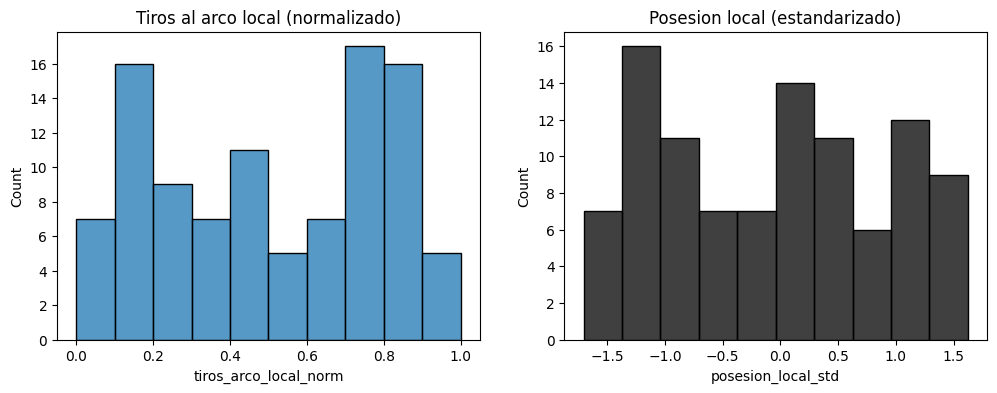

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax =plt.subplots(1,2, figsize=(12,4))

# Visualizar tiros al arco (Normalizacion)
sns.histplot(df['tiros_arco_local_norm'], bins=10, ax=ax[0])
ax[0].set_title('Tiros al arco local (normalizado)')

# Visualizar posesion total (Normalizacion)
sns.histplot(df['posesion_local_std'], bins=10, ax=ax[1], color='black')
ax[1].set_title("Posesion local (estandarizado)")

plt.show()